# Detecteur de Harris


L'objectif de ce TP est de mettre au point votre propre détecteur de points d'intérêts en suivant la méthode de Harris (c.f. cours).

## Exercice 1 : calcul du critère de Harris
Il s'agit ici d'écrire une fonction ou un ensemble de fonctions permettant de renvoyer la carte des coins de Harris $ H = det C - \alpha (trace C)^{2}$ à partir d'une image donnée et pour une échelle donnée (taille de la fenêtre). On prendra $\alpha = 0.04$.

### Etape 1
Calcul de $I_{x}$ et $I_{y}$ gradient en $x$ et en $y$ d'une image lissée à l'aide de l'opérateur de Sobel.

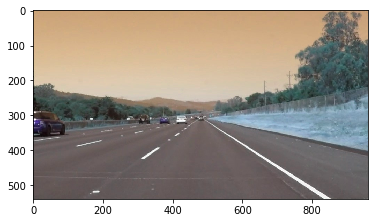

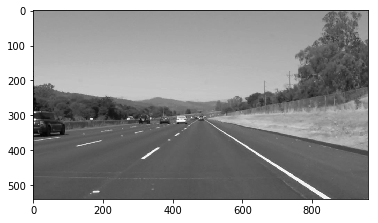

(540, 960)
(540, 960)
(540, 960)


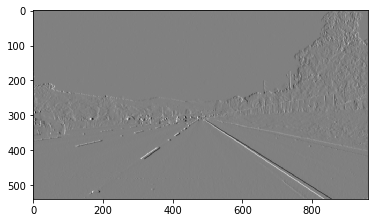

In [72]:
# TO COMPLETE
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("./Data/LAB3/road.jpg", 1)
plt.imshow(img)
plt.show()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
plt.show()

Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
print(gray.shape)
print(Ix.shape)
print(Iy.shape)

plt.imshow(Ix, cmap="gray")
plt.show()

### Etape 2
Calcul de $I_{x}^{2}$, $I_{x}^{2}$ et $I_{xy}= I_{x} \times I_{y}$

In [20]:
x2 = [[None for _ in range(img.shape[1])] for _ in range(img.shape[0])]
y2 = [[None for _ in range(img.shape[1])] for _ in range(img.shape[0])]
xy = [[None for _ in range(img.shape[1])] for _ in range(img.shape[0])]

for i in range(Ix.shape[0]):
    for j in range(Ix.shape[1]):
        ix = Ix[i,j]
        iy = Iy[i,j]
        x2[i][j] = ix** 2
        y2[i][j] = iy ** 2
        xy[i][j] = ix * iy
        
        


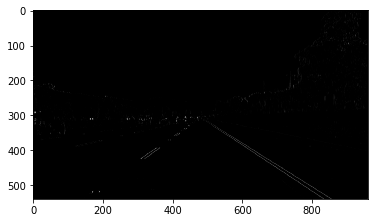

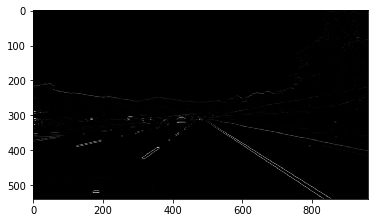

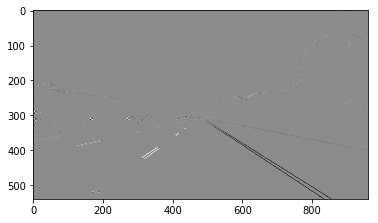

In [21]:
import numpy as np
x2 = np.asarray(x2)
y2 = np.asarray(y2)
xy = np.asarray(xy)

plt.imshow(x2, cmap="gray")
plt.show()
plt.imshow(y2, cmap="gray")
plt.show()
plt.imshow(xy, cmap="gray")
plt.show()

### Etape 3
Lisser avec un filtre gaussien de taille $N$ chacune des images précédentes.

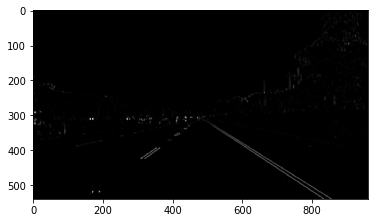

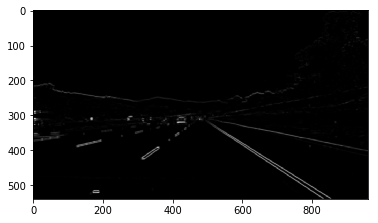

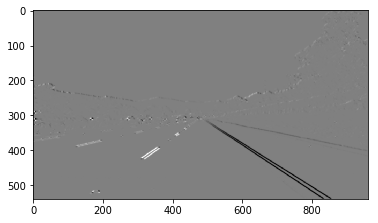

In [24]:
# TO COMPLETE
x2_lisse = cv2.GaussianBlur(x2, (7, 7), 1.1)
y2_lisse = cv2.GaussianBlur(y2, (7, 7), 1.1)
xy_lisse = cv2.GaussianBlur(xy, (7, 7), 1.1)

plt.imshow(x2_lisse, cmap="gray")
plt.show()
plt.imshow(y2_lisse, cmap="gray")
plt.show()
plt.imshow(xy_lisse, cmap="gray")
plt.show()


### Etape 4
En chaque pixel, calculer la fonction de Harris :$ H = det C - \alpha (trace C)^{2}$ avec $\alpha = 0.04$


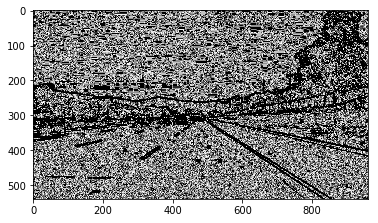

In [59]:
# TO COMPLETE
alpha = 0.04
H = [[None for _ in range(img.shape[1])] for _ in range(img.shape[0])]
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        detC = x2[i,j]*y2[i,j] - xy[i,j]**2
        traceC = x2[i,j] + y2[i,j]
        H[i][j] = (detC - alpha*(traceC**2)).astype(np.uint8)

H = np.asarray(H)
plt.imshow(H, cmap="gray")
plt.show()

Appliquer sur l'image de maison et afficher l'image $H$. 

In [63]:
print(type(gray[0,0]))
print(type(H[0,0]))

better_gray = [[None for _ in range(img.shape[1])] for _ in range(img.shape[0])]
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        better_gray[0][0] = gray[0,0].astype(np.float64)

better_gray = np.asarray(better_gray)

print(type(better_gray[0,0]))

<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.float64'>


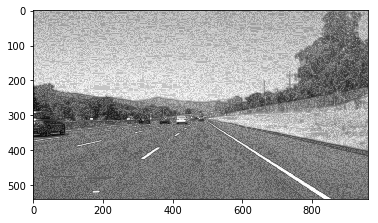

In [70]:
blend = cv2.addWeighted(gray, 1, H, 0.2, 0)
plt.imshow(blend, cmap="gray")

## Exercice 2 : détection des coins

Il s'agit ici de mettre en place les fonctions pour détecter les coins à partir de la carte des coins construite dans la partie précédente.

Ecrire une fonction permettant de binariser la carte des coins par une opération de seuillage.

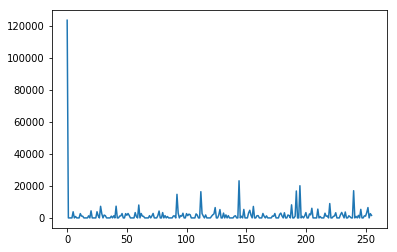

114


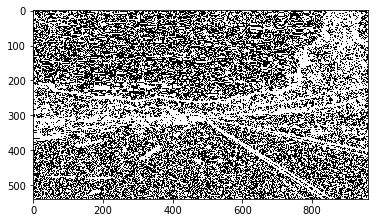

In [94]:
hist, bins = np.histogram(H.flatten(), 256, [0, 256])
x = np.linspace(0, 255, 256)

plt.plot(x, hist)
plt.show()
sum1 = hist[0]
sum2 = np.sum(hist[1:])
lim = 1
while sum2 > sum1:
    sum1 = np.sum(hist[:lim])
    sum2 = np.sum(hist[lim:])
    lim+=1
print(lim)

new_H = [[None for _ in range(H.shape[1])] for _ in range(H.shape[0])]

for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        if H[i,j] > lim:
            new_H[i][j] = 0
        else:
            new_H[i][j] = 255
            
new_H = np.asarray(new_H)
            
plt.imshow(new_H, cmap="gray")




Ecrire une fonction permettant d'extraire les maxima locaux sur un voisinage $3 \times 3$ (mettre à 0 dans l'image binarisée tous les points  dont la valeur n'est pas supérieure à celle des 8 voisins ) 

In [0]:
# TO COMPLETE

Ecrire une fonction permettant d'afficher les points détectés en dessinant une croix blanche en chaque point sur l'image originale.

Appliquer sur l'image de maison

## Exercice 3
Plusieurs fonctions sont disponibles dans OpenCV pour le calcul de points d'intérêts. :
+ [cornerHarris](http://docs.opencv.org/3.2.0/dc/d0d/tutorial_py_features_harris.html)
+ [cornerSubPix](http://docs.opencv.org/3.2.0/dc/d0d/tutorial_py_features_harris.html)
+ [goodFeaturesToTrack](http://docs.opencv.org/3.2.0/d4/d8c/tutorial_py_shi_tomasi.html) qui correspond à l'approche de Shi Tomasi
+ [SIFT](http://docs.opencv.org/3.2.0/da/df5/tutorial_py_sift_intro.html)

Documentez vous sur ces différentes fonctions et utilisez les pour calculer des points d'intérêts sur différentes images et notamment l'image (les images) utilisées dans la première partie de ce TP.

